# CGLE

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from cgle import cgle
import torch

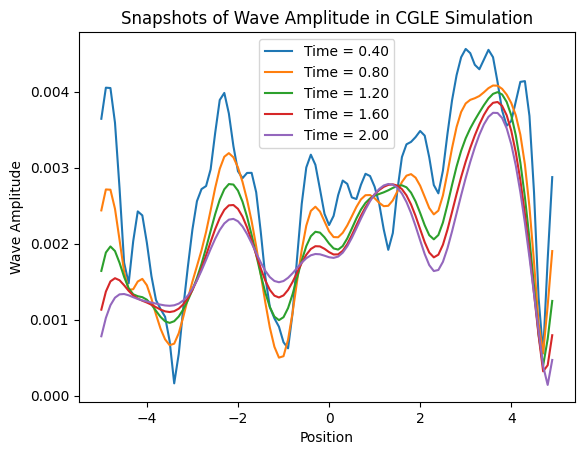

In [11]:
# Adjusted Parameters
alpha = 0.1
beta = 0.1
gamma = 0.1

# Spatial discretization
dx = 0.1
L = 10.0
x = torch.arange(-L/2, L/2, dx)
N = x.size(0)

# Temporal discretization
dt = 0.001
T = 2.0
num_steps = int(T / dt)

# Initial condition (small disturbance)
A = 0.01 * torch.randn(N, dtype=torch.cfloat)

# Create an instance of the cgle class
cgle_simulation = cgle(alpha, beta, gamma, dx, dt)

# Prepare the figure
fig, ax = plt.subplots()

# Times at which to take snapshots
snapshot_indices = torch.linspace(0, num_steps - 1, 6, dtype=torch.int)[1:]
snapshot_data = []

# Run the simulation and take snapshots
for step in range(num_steps):
    try:
        A = cgle_simulation.update(A)
    except ValueError as e:
        print(e)
        break
    if step in snapshot_indices:
        snapshot_data.append((step * dt, torch.abs(A).cpu().numpy()))

# Plot the snapshots
for time, data in snapshot_data:
    ax.plot(x.cpu().numpy(), data, label=f'Time = {time:.2f}')

ax.set_xlabel('Position')
ax.set_ylabel('Wave Amplitude')
ax.legend()
ax.set_title('Snapshots of Wave Amplitude in CGLE Simulation')
plt.show()
